#Transformers

In this notebook, we will cover:

1. What transformers are

2. The motivation behind transformers

3. How transformers work

4. How to perform common NLP tasks using transformers

## 1. What is a Transformer?


The Transformer is a deep learning architecture introduced in the seminal paper "Attention Is All You Need" by Vaswani et al. in 2017. It revolutionized the field of natural language processing (NLP) by relying entirely on self-attention mechanisms, bypassing the recurrent and convolutional architectures traditionally used for sequence data. The key innovation of transformers is their ability to capture long-range dependencies in data through attention, making them both highly effective and computationally efficient for parallel processing. Originally designed for text, transformers have since been adapted for various domains, including image processing (Vision Transformers), audio analysis, and even multi-modal tasks.


__Types of Transformers and Their Applications:__

__1. Text Processing:__ Transformers like BERT, GPT, and T5 dominate NLP tasks such as language modeling, translation, summarization, and sentiment analysis. These models tokenize text input, embed tokens into high-dimensional spaces, and process them using layers of attention and feedforward networks.


__2. Image Processing:__ Vision Transformers (ViT) are adapted to process image data by dividing images into patches (like words in text) and treating them as sequences. They excel in tasks like object recognition, classification, and segmentation, often rivaling or surpassing convolutional neural networks (CNNs).

__3. Audio Processing:__ Transformers in audio handle tasks like speech recognition, audio classification, and generation. Wav2Vec and AST (Audio Spectrogram Transformer) are examples that leverage either raw waveforms or spectrograms as input sequences.

## 2. Why Transformers?

Feedforward neural networks form the foundation of deep learning. These networks:

Take an input (e.g., a vector of numbers).
Pass it through multiple layers of neurons.
Transform the input at each layer via weighted sums and activation functions to learn complex patterns.
While effective, FFNNs are:

__Static:__ They work well for fixed-sized inputs but struggle with sequential data like text.

__Context-Limited:__ They process inputs as independent units and can’t capture relationships across sequences.

This limitation brings us to more advanced architectures for sequence data, like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM), and now Transformers.


Transformers solve key issues in sequential data processing:

- **Parallelization:** Unlike RNNs, transformers process the entire sequence at once, enabling efficient computation.

- **Long-Range Context:** Transformers use attention mechanisms to focus on relevant parts of the input, even when they are far apart in the sequence.


## 3. How they work



Transformers rely on four core concepts:


__(i) Tokenizer__


Data is passed to a tokenizer which is a preprocessing tool used in Natural Language Processing (NLP). It breaks down a piece of data into smaller units, called tokens. These tokens are the building blocks that a machine learning model can process.



__(ii) Encoding Input Context with Attention:__

Each word (or token) in the input gets a representation that accounts for its relationship with all other words in the sequence. For example:

- Sentence: "Transformers are amazing!"
- Tokens: `["Transformers", "are", "amazing", "!"]`
- IDs: `[100, 200, 300, 400]` (IDs depend on the specific tokenizer and model).


__(iii) Transforming Representations:__

The contextualized embeddings pass through multiple transformer layers. With each layer, the model gains a deeper and more refined understanding of the sentence structure and meaning.

__(iv) Decoding:__

The decoder uses the encoded information to generate meaningful output (e.g., translated text, summarized content).

---
__Example:__ Consider the sentence "The cat sat on the mat". Here is how a transformer translate this in French:


- 1. The words are split into tokens: `["The", "cat", "sat", "on", "the", "mat"]`. Each token is converted into a numerical representation (embedding).

- 2. Attention is applied: The model learns that "cat" is more relevant to "sat" and "mat" than to "on" or "the". These relationships are encoded as attention scores.


- 3. Early layers focus on syntactic relationships (e.g., the role of "the" as a determiner for "cat").
Deeper layers focus on semantic relationships (e.g., "sat" implies an action performed by "cat").


- 4. The decoder, takes the refined representations from the encoder and generates the translation in French:

The output begins with a token, prompting the model to predict the first word.

The decoder predicts "Le" (the French equivalent of "The") based on the encoded input.
Subsequent tokens are generated one at a time: `"chat", "s'est", "assis", "sur", "le", "tapis"`.


__Output:__


The final translation is "Le chat s'est assis sur le tapis."

Here’s a Python demonstration of key concepts in transformers using Hugging Face.

In [ ]:
#Install Required Libraries
!pip install transformers
!pip install torch torchvision

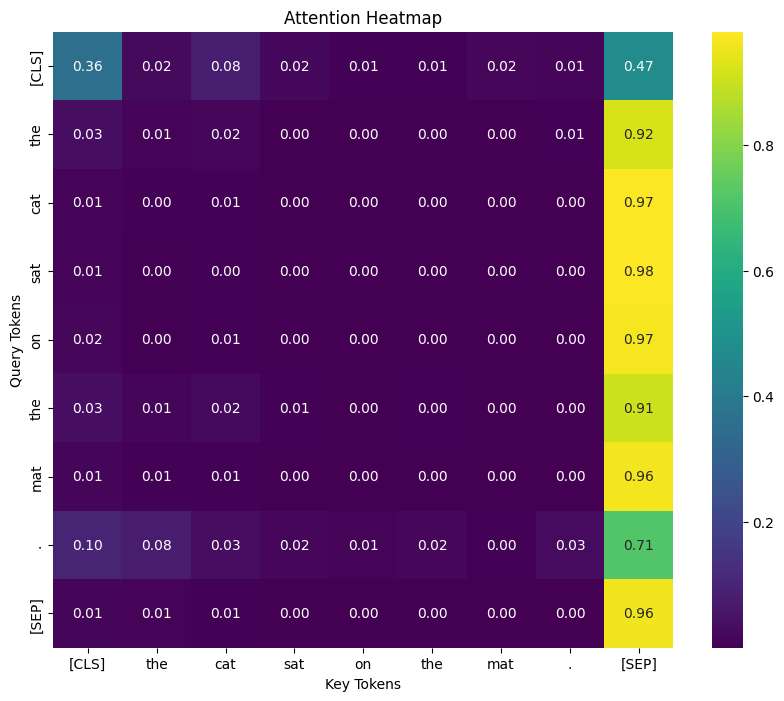

In [4]:
from transformers import AutoTokenizer, AutoModel
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
#load model
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Input sentence
sentence = "The cat sat on the mat."
inputs = tokenizer(sentence, return_tensors="pt")

# Get outputs with attention
outputs = model(**inputs) ## **: Dynamic Argument Passing. You don’t need to know
                          ## in advance all the arguments a model might need
                          ## they can be included in the dictionary and passed automatically.

attention = outputs.attentions  ## Attention weights. Typically a list of tensors for each layer.


# Visualize attention for one head in the last layer
attention_layer = attention[-1][0, 0].detach().numpy()  ## [0,0] Selects the first head (out of multiple attention heads)
                                                        ## for the first input sequence in the batch.
                                                        ## attention[-1]: Accesses the last layer's attention scores.

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot attention
plt.figure(figsize=(10, 8))
sns.heatmap(attention_layer, xticklabels=tokens, yticklabels=tokens, cmap="viridis", annot=True, fmt=".2f")
plt.title("Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


Structure of the Heatmap

__Axes:__

- The x-axis represents the tokens the model is paying attention to.

- The y-axis represents the tokens that are doing the paying attention.

Both axes show the same tokens (e.g., "The", "cat", "sat", "on", "the", "mat").

__Cells:__
Each cell in the heatmap corresponds to an attention score between two tokens.

- A high score (brighter color) means that the token on the y-axis strongly focuses on the token on the x-axis.
- A low score (darker color) indicates weak or no attention between the tokens.

## Natural Language Processing (NLP) Using Transformers

Here we cover some common tasks in NLP and show how they are done using transformers.

To maake these tasks easier, we use the `pipeline` function from the Hugging Face Transformers library. This function automates key steps like loading pre-trained models, preprocessing data, and generating predictions.

For example, if you want to summarize a passage, you can use the **summarization pipeline** to quickly generate a short version of the text.


The `pipeline()` function supports many tasks and models. Common tasks include:  


1. **`"translation"`** - Translate text between languages.  

2. **`"text-classification"`** - Assign labels to text (e.g., spam detection).  

3. **`"question-answering"`** - Answer questions based on context.  

4. **`"text-generation"`** - Generate text, like stories or chatbot replies.  


The `model` parameter lets you pick a pre-trained model for the task, such as:  
- **`"bert-base-uncased"`** for text classification.

- **`"t5-small"`** for translation.  

### Text Summarization using Transformers

In [ ]:
from transformers import pipeline

# Load the summarization pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Input text
text = """
The Transformer is a novel neural network architecture designed to handle sequential data.
Introduced in 2017, it has revolutionized the field of deep learning, particularly in natural language processing.
Its core innovation, self-attention, allows it to focus on relevant parts of input data,
enabling efficient and parallel computation. This makes it highly versatile and capable of handling tasks
ranging from text processing to image and audio analysis.
"""

# Generate summary
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
## The do_sample controls whether the model generates text using sampling (True)
## or by choosing tokens with the highest probability at each step (False).

print("Summary:")
print(summary[0]['summary_text'])


Summary:
The Transformer is a novel neural network architecture designed to handle sequential data. Its core innovation, self-attention, allows it to focus on relevant parts of input data.


The summary is stored as a dictionary in summary[0] under the key 'summary_text'.

You can also adjust settings for specific tasks. For example:  
- `max_length` and `min_length` control output length.
  
- `do_sample` decides how text is generated.  

If `do_sample=False`, the model uses **greedy decoding** (always picking the most likely word). Setting `do_sample=True` adds randomness for more varied results.  

Learn more about decoding in this [guide on decoding strategies](https://towardsdatascience.com/decoding-strategies-that-you-need-to-know-for-response-generation-ba95ee0faadc).

In [5]:
# explore different values for max_length, min_length, and do_sample to get a satisfactory summary.

### Sentiment Analysis with Transformers

In this exercise, you will use the Hugging Face pipeline() to explore an NLP task.

In [9]:
from transformers import pipeline


In [10]:
#  Create a sentiment_analyzer pipeline
sentiment_analyzer = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [11]:
# Choose a sentence to analyze
text = "I don't like cats!"


In [12]:
#Use the pipeline to analyze the sentiment of the sentence:
result = sentiment_analyzer(text)
print(result)

[{'label': 'NEGATIVE', 'score': 0.9966341853141785}]


This is clearly a negative sentence. Explore some other sentences where no negative verb is used. For example: I feel a bit underweather

In [14]:
## you code

### Translation with Transformers

In [90]:
# Load the translation model for English to French
translator_en_fr = pipeline("translation_en_to_fr", model="t5-small")

In [92]:
translator_en_fr("I like cats")

In [93]:
# Load the translation model for English to Spanish
translator_en_es = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")


In [ ]:
# Write a sentence in English and print its translation in Spanish

[{'translation_text': 'Me gusta el Dr. Soheyl.'}]

In [ ]:
# Load the translation model for English to Chinese (Simplified)
translator_en_zh = pipeline("translation_en_to_zh", model="Helsinki-NLP/opus-mt-en-zh")


In [94]:
# Write a sentence in English and print its translation in Chinese

You can explore other translations too.


### Text Generation using Transformner

Let’s now build a simple interface that allows you to demo a text-generation model like GPT-2. We’ll load our model using the `pipeline()` function from Transformers.

In [21]:
from transformers import pipeline

generator = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [22]:
generator("I like cats because")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'I like cats because of cats. When they\'re bored, just go do something a lot."\n\nHip-Hop was always so popular. It was just part of the fun. But the world of the show, Hype, didn\'t'}]

Not good. We can add more details and also twick the parameters a little to get a better result:

In [23]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "I cats over dogs because",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'I cats over dogs because they are bigger, more dangerous than cats. And I think the reason that cats are so large is because if I were to'},
 {'generated_text': 'I cats over dogs because I have a problem with my cat and I can’t handle it‒,’’’�'}]

Explore other parameters till you get a satisfactory text generation.

Here are some useful links to read more:

1. How to build interactive demos for your machine learning models: https://huggingface.co/learn/nlp-course/chapter9/1

2. How to build a question answering system: https://huggingface.co/learn/nlp-course/chapter7/7

3. How to create a language model from scratch: https://huggingface.co/learn/nlp-course/chapter7/6
